## Spooky Author Identification

The competition dataset contains text from works of fiction written by spooky authors of the public domain: Edgar Allan Poe, HP Lovecraft and Mary Shelley. The data was prepared by chunking larger texts into sentences using CoreNLP's MaxEnt sentence tokenizer, so you may notice the odd non-sentence here and there. Your objective is to accurately identify the author of the sentences in the test set.

#### Data fields
* id - a unique identifier for each sentence
* text - some text written by one of the authors
* author - the author of the sentence (EAP: Edgar Allan Poe, HPL: HP Lovecraft; MWS: Mary Wollstonecraft Shelley)

You can also find the dataset <a href = "https://www.kaggle.com/competitions/spooky-author-identification/overview"> here</a>

***

### Import necessary libraries

In [654]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras import layers
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Read 'spooky.csv' dataset

In [656]:
df = pd.read_csv('spooky.csv')

In [657]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


### Drop 'id' column

In [659]:
df.drop(columns='id',inplace=True)


In [660]:
df.head()

,text,author
0,"This process, however, afforded me no means of...",EAP
1,It never once occurred to me that the fumbling...,HPL
2,"In his left hand was a gold snuff box, from wh...",EAP
3,How lovely is spring As we looked from Windsor...,MWS
4,"Finding nothing else, not even gold, the Super...",HPL


### Check for missing values

In [662]:
df.isna()

,text,author
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
19574,False,False
19575,False,False
19576,False,False
19577,False,False


### Check for duplicates

In [664]:
df.duplicated().sum()

0

### Print some of the text along with its author

In [666]:
for i in range(10):
    print(df['text'][i],'-', df['author'][i])
    print()

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall. - EAP

It never once occurred to me that the fumbling might be a mere mistake. - HPL

In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction. - EAP

How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair. - MWS

Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk. - HPL

A youth passed in solitude, my best years spent under your gentle and feminine

### Create a function to preproces the text

In [668]:
# def preprocess(sentence):
#     #removes all the special characters and split the sentence at spaces
#     text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
#     # converts words to lowercase and removes any stopwords
#     words = [x.lower() for x in text if x not in stopwords.words('english')]
    
#     # Lemmatize the words
#     lemma = WordNetLemmatizer()
#     word = [lemma.lemmatize(word,'v') for word in words ]
    
#     # convert the list of words back into a sentence
#     word = ' '.join(word)
#     return word
# df['text'] = df['text'].apply(preprocess)

### Print some of the text after preprocess

In [670]:
for i in range(10):
    print(df['text'][i],'-', df['author'][i])
    print()

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall. - EAP

It never once occurred to me that the fumbling might be a mere mistake. - HPL

In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction. - EAP

How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair. - MWS

Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk. - HPL

A youth passed in solitude, my best years spent under your gentle and feminine

### Check for imbalance in the dataset

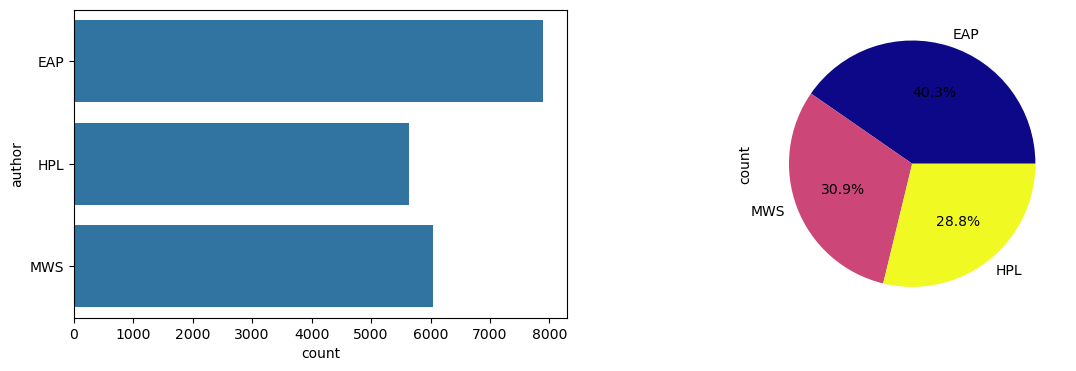

In [672]:
plt.figure(figsize= (14,4))
plt.subplot(1,2,1)
sns.countplot(y = df['author'])
plt.subplot(1,2,2)
df['author'].value_counts().plot.pie(autopct = '%1.1f%%', cmap = 'plasma')
plt.show()

### Split the dataset into Input & Target Variables

In [674]:
X = df['text']
y = df['author']

In [675]:
y = y.map({'EAP':0,'HPL':1,"MWS":2})

### Label Encode our target variables

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [678]:
tokenizer = Tokenizer(num_words=10000)

In [679]:
tokenizer.fit_on_texts(X)

In [680]:
vocab_size = len(tokenizer.word_index) + 1

### Split the dataset into Training & Testing set

In [682]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)


In [683]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=50,padding='post')    
       
    return padded_sequence

In [684]:
X_train = text_encoding(X_train)
X_test = text_encoding(X_test)

In [685]:
X_train

array([[7998,  422,   27, ...,    0,    0,    0],
       [  11,   40, 3088, ...,    0,    0,    0],
       [  92,  771,    3, ...,    0,    0,    0],
       ...,
       [4160,  463, 2591, ...,    0,    0,    0],
       [   5,  107,  197, ...,    0,    0,    0],
       [   1, 3162,    8, ...,    0,    0,    0]])

In [686]:
samples = len(X_train)

### Create keras Sequential model with GRU layers

In [688]:
model = Sequential()
### Embedding layer

model.add(layers.Embedding(vocab_size, 128,input_shape=(samples,)))

### GRU layer
### return_sequences: Whether to return the last output in the output sequence, or the full sequence.
model.add(layers.GRU(128))
model.add(layers.Dense(256, activation ='relu'))
model.add(layers.Dense(128, activation ='relu'))
model.add(layers.Dense(64, activation ='relu'))


model.add(layers.Dense(3, activation='softmax'))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [689]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 17621, 128)          │       3,320,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,494,275 (13.33 MB)

 Trainable params: 3,494,275 (13.33 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [691]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

### Train the model

In [693]:
model.fit(X_train, y_train, epochs=10, validation_split = 0.2,batch_size=22)

Epoch 1/10
641/641 ━━━━━━━━━━━━━━━━━━━━ 55s 74ms/step - accuracy: 0.3954 - loss: 1.0905 - val_accuracy: 0.3989 - val_loss: 1.0862
Epoch 2/10
641/641 ━━━━━━━━━━━━━━━━━━━━ 46s 72ms/step - accuracy: 0.4100 - loss: 1.0845 - val_accuracy: 0.4068 - val_loss: 1.0812
Epoch 3/10
641/641 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.4178 - loss: 1.0714 - val_accuracy: 0.4139 - val_loss: 1.0776
Epoch 4/10
641/641 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.4277 - loss: 1.0543 - val_accuracy: 0.4496 - val_loss: 1.0542
Epoch 5/10
641/641 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.5004 - loss: 0.9855 - val_accuracy: 0.6065 - val_loss: 0.8713
Epoch 6/10
641/641 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - accuracy: 0.6858 - loss: 0.7159 - val_accuracy: 0.7538 - val_loss: 0.6615
Epoch 7/10
641/641 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.8396 - loss: 0.4262 - val_accuracy: 0.7512 - val_loss: 0.6641
Epoch 8/10
641/641 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.8840 - loss: 0.3130 - 

### Make predictions with X_test

In [742]:
y_pred = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


### Fetch the index of the higher probable prediction

In [750]:
y_pred = [np.argmax(i) for i in y_pred]

### Evaluate the model

#### Accuracy score

In [752]:
accuracy_score(y_test, y_pred)

0.8059244126659857

#### Confusion matrix

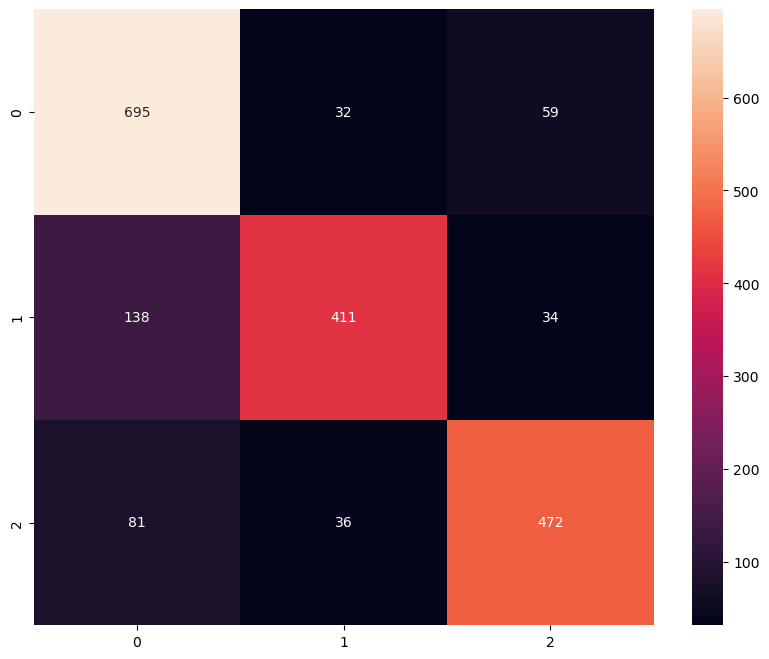

In [755]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

#### Classification Report

In [758]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       786
           1       0.86      0.70      0.77       583
           2       0.84      0.80      0.82       589

    accuracy                           0.81      1958
   macro avg       0.82      0.80      0.80      1958
weighted avg       0.81      0.81      0.80      1958



***